In [1]:
%pip install -qqq rsnl;

Note: you may need to restart the kernel to use updated packages.


In [2]:
# shouldn't have to do this...
%pip install -qqq matlabengine==23.2.3;

Note: you may need to restart the kernel to use updated packages.


In [3]:
from rsnl.inference import run_rsnl
from rsnl.model import get_robust_model
from rsnl.visualisations import plot_and_save_all


/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/jaxtyping/__init__.py:244: UserWarning: jaxtyping version >=0.2.23 should be used with Equinox version >=0.11.1
  warnings.warn(


In [4]:
import jax
import flowjax
print("JAX version:", jax.__version__)
print("FlowJAX version:", flowjax.__version__)


JAX version: 0.4.23
FlowJAX version: 8.1.0


In [5]:
from mm_sbi_review.examples.misspec_ma1 import assumed_dgp,autocov, calculate_summary_statistics, true_dgp

In [6]:
import jax.numpy as jnp
import jax.random as random
import pickle as pkl
import os
import arviz as az
import numpyro.distributions as dist  # type: ignore
from functools import partial


In [7]:

def get_prior():
    """Return prior for inference on misspec MA(1)."""
    return dist.Uniform(low=jnp.array([-1.0]),
                        high=jnp.array([1.0]))


/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,
sample: 100%|██████████| 3500/3500 [00:01<00:00, 3405.49it/s, 15 steps of size 3.20e-01. acc. prob=0.87]


Round 1 MCMC took 6.35 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -0.00      1.34      0.02     -2.20      2.08    771.48      1.00
adj_params[1]     -0.06      1.39     -0.03     -2.43      2.03    975.50      1.00
     theta[0]     -0.03      0.57     -0.02     -0.93      0.81    998.77      1.00

Number of divergences: 0
Round 1 simulations took 0.29 seconds


100%|██████████| 500/500 [00:08<00:00, 55.60it/s, train=0.199, val=0]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 1 flow training took 9.17 seconds


sample: 100%|██████████| 3500/3500 [00:04<00:00, 828.34it/s, 3 steps of size 2.04e-01. acc. prob=0.81]  


Round 2 MCMC took 31.99 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.35      0.29     -2.36     -2.78     -1.82   1067.97      1.00
adj_params[1]     -0.06      1.42      0.01     -2.33      2.28    920.33      1.00
     theta[0]      0.03      0.11      0.02     -0.15      0.22    927.99      1.00

Number of divergences: 0
Round 2 simulations took 0.01 seconds


100%|██████████| 500/500 [00:15<00:00, 33.07it/s, train=0.57, val=0] 
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 2 flow training took 15.33 seconds


sample: 100%|██████████| 3500/3500 [00:03<00:00, 884.00it/s, 7 steps of size 2.21e-01. acc. prob=0.83]  


Round 3 MCMC took 30.76 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.65      0.34     -2.61     -3.23     -2.13   1056.46      1.00
adj_params[1]     -0.00      1.44      0.02     -2.36      2.12    989.85      1.00
     theta[0]     -0.00      0.11     -0.00     -0.21      0.16    937.88      1.00

Number of divergences: 0
Round 3 simulations took 0.01 seconds


 13%|█▎        | 65/500 [00:05<00:39, 10.91it/s, train=0.961, val=0.96 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 3 flow training took 6.23 seconds


sample: 100%|██████████| 3500/3500 [00:03<00:00, 993.32it/s, 7 steps of size 4.10e-01. acc. prob=0.87] 


Round 4 MCMC took 28.21 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.70      0.43     -2.70     -3.36     -2.08    926.75      1.00
adj_params[1]     -0.01      1.36      0.01     -2.44      2.11    819.32      1.01
     theta[0]      0.00      0.12      0.00     -0.22      0.18   1079.56      1.00

Number of divergences: 0
Round 4 simulations took 0.00 seconds


 10%|▉         | 49/500 [00:05<00:50,  8.88it/s, train=1.16, val=1.22 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 4 flow training took 5.81 seconds


sample: 100%|██████████| 3500/3500 [00:03<00:00, 1023.97it/s, 7 steps of size 4.13e-01. acc. prob=0.82] 


Round 5 MCMC took 29.23 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.76      0.41     -2.74     -3.46     -2.16    832.16      1.00
adj_params[1]      0.08      1.36      0.02     -1.86      2.42   1030.54      1.00
     theta[0]     -0.00      0.12     -0.00     -0.20      0.19    992.50      1.00

Number of divergences: 0
Round 5 simulations took 0.01 seconds


  9%|▉         | 45/500 [00:05<00:57,  7.93it/s, train=1.29, val=1.64 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 5 flow training took 5.95 seconds


sample: 100%|██████████| 3500/3500 [00:03<00:00, 1000.09it/s, 7 steps of size 4.14e-01. acc. prob=0.83] 


Round 6 MCMC took 28.70 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.84      0.43     -2.82     -3.50     -2.13   1100.81      1.00
adj_params[1]      0.01      1.37     -0.02     -2.25      2.27    958.47      1.00
     theta[0]      0.03      0.12      0.02     -0.17      0.20    961.96      1.00

Number of divergences: 0
Round 6 simulations took 0.01 seconds


 18%|█▊        | 90/500 [00:09<00:44,  9.17it/s, train=1.39, val=1.48 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 6 flow training took 10.09 seconds


sample: 100%|██████████| 3500/3500 [00:03<00:00, 1002.64it/s, 7 steps of size 4.17e-01. acc. prob=0.81]


Round 7 MCMC took 29.29 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.79      0.52     -2.80     -3.54     -2.17    488.43      1.00
adj_params[1]     -0.04      1.39     -0.04     -2.25      2.37    985.44      1.00
     theta[0]      0.01      0.13      0.01     -0.19      0.17    619.27      1.00

Number of divergences: 0
Round 7 simulations took 0.00 seconds


  6%|▌         | 30/500 [00:05<01:25,  5.51it/s, train=1.5, val=1.52 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 7 flow training took 5.73 seconds


sample: 100%|██████████| 3500/3500 [00:03<00:00, 878.34it/s, 7 steps of size 4.56e-01. acc. prob=0.85]  


Round 8 MCMC took 30.70 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.80      0.49     -2.83     -3.61     -2.16    875.14      1.00
adj_params[1]     -0.01      1.40      0.03     -2.27      2.22   1018.04      1.00
     theta[0]      0.02      0.12      0.02     -0.17      0.19    851.78      1.00

Number of divergences: 0
Round 8 simulations took 0.01 seconds


  6%|▋         | 32/500 [00:06<01:28,  5.32it/s, train=1.59, val=1.7 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 8 flow training took 6.30 seconds


sample: 100%|██████████| 3500/3500 [00:03<00:00, 909.46it/s, 7 steps of size 4.59e-01. acc. prob=0.84] 


Round 9 MCMC took 30.62 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.82      0.43     -2.80     -3.47     -2.09    902.59      1.00
adj_params[1]      0.05      1.46      0.02     -2.27      2.35    945.76      1.00
     theta[0]      0.00      0.10     -0.00     -0.16      0.18   1073.43      1.00

Number of divergences: 0
Round 9 simulations took 0.01 seconds


  6%|▌         | 31/500 [00:06<01:36,  4.87it/s, train=1.66, val=1.78 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:110: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 9 flow training took 6.65 seconds


sample: 100%|██████████| 3500/3500 [00:03<00:00, 926.50it/s, 7 steps of size 4.08e-01. acc. prob=0.85] 


Round 10 MCMC took 30.28 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.86      0.44     -2.84     -3.53     -2.15    812.95      1.00
adj_params[1]      0.02      1.38      0.04     -2.22      2.21    920.65      1.00
     theta[0]      0.01      0.11      0.01     -0.16      0.17   1033.82      1.00

Number of divergences: 0
Round 10 simulations took 0.01 seconds


  6%|▌         | 29/500 [00:06<01:39,  4.76it/s, train=1.72, val=1.76 (Max patience reached)]
/Users/ryankelly/python_projects/mm_sbi_review/.venv/lib/python3.11/site-packages/rsnl/inference.py:230: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel,


Round 10 flow training took 6.40 seconds


sample: 100%|██████████| 11000/11000 [00:06<00:00, 1746.72it/s, 7 steps of size 5.24e-01. acc. prob=0.79]


Final posterior MCMC took 39.37 seconds
Total MCMC time: 315.49 seconds
Total simulation time: 0.34 seconds
Total flow training time: 77.68 seconds

                   mean       std    median      5.0%     95.0%     n_eff     r_hat
adj_params[0]     -2.89      0.47     -2.88     -3.62     -2.15  12920.06      1.00
adj_params[1]      0.02      1.42      0.01     -2.27      2.32  21256.59      1.00
     theta[0]      0.02      0.11      0.02     -0.15      0.20  16609.32      1.00

Number of divergences: 0


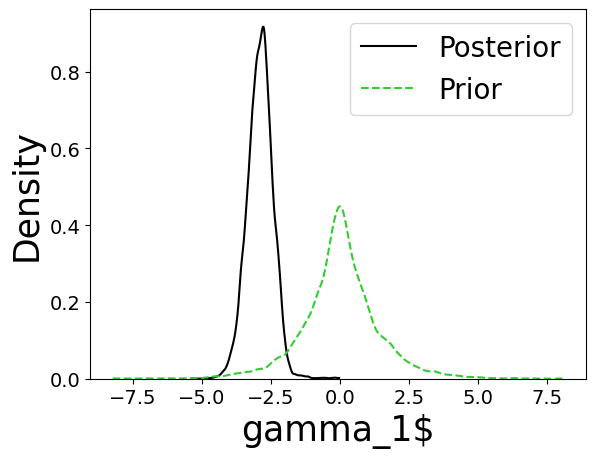

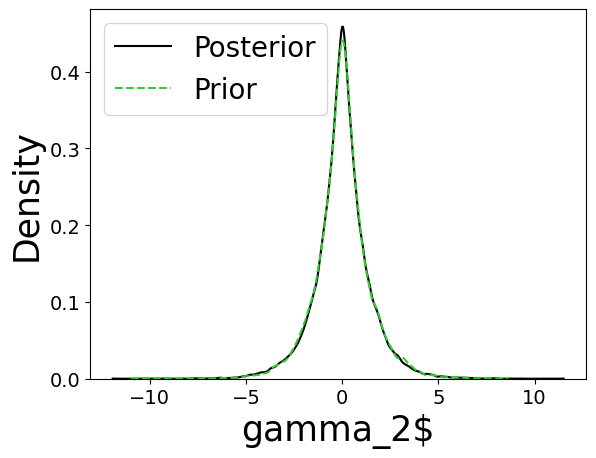

<Figure size 640x480 with 0 Axes>

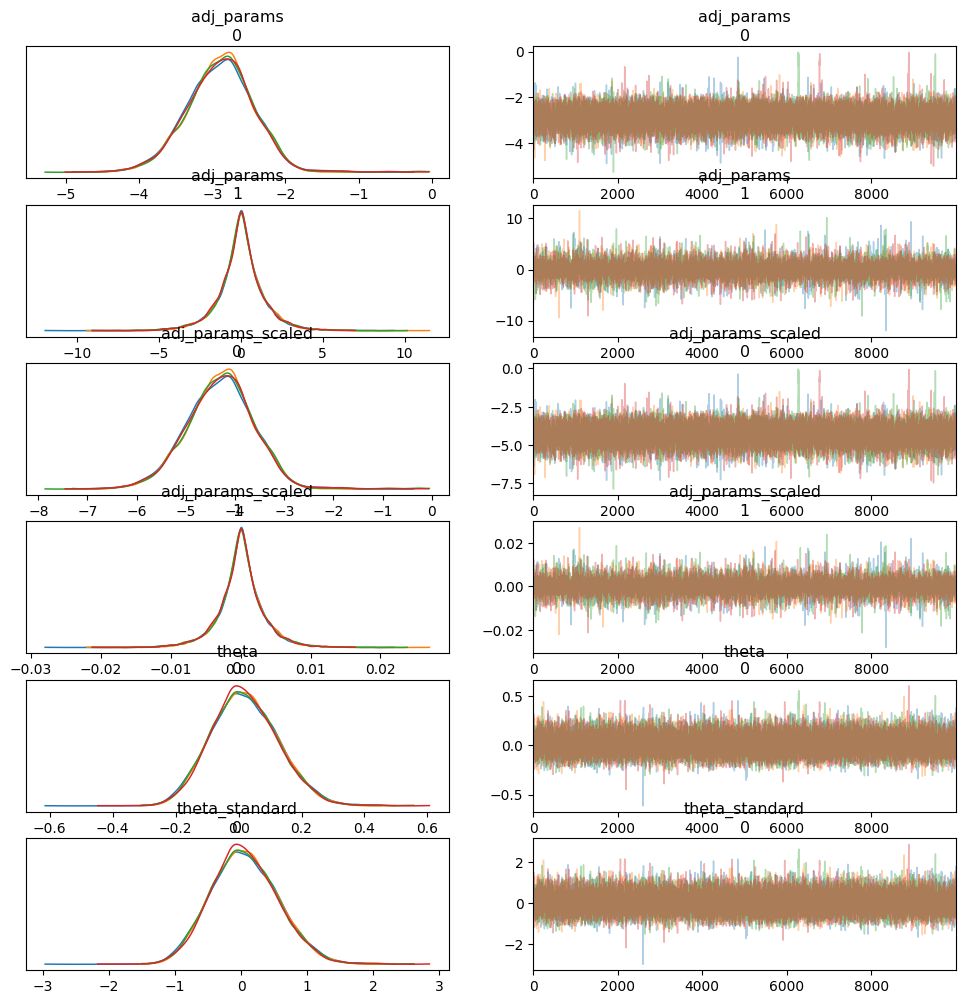

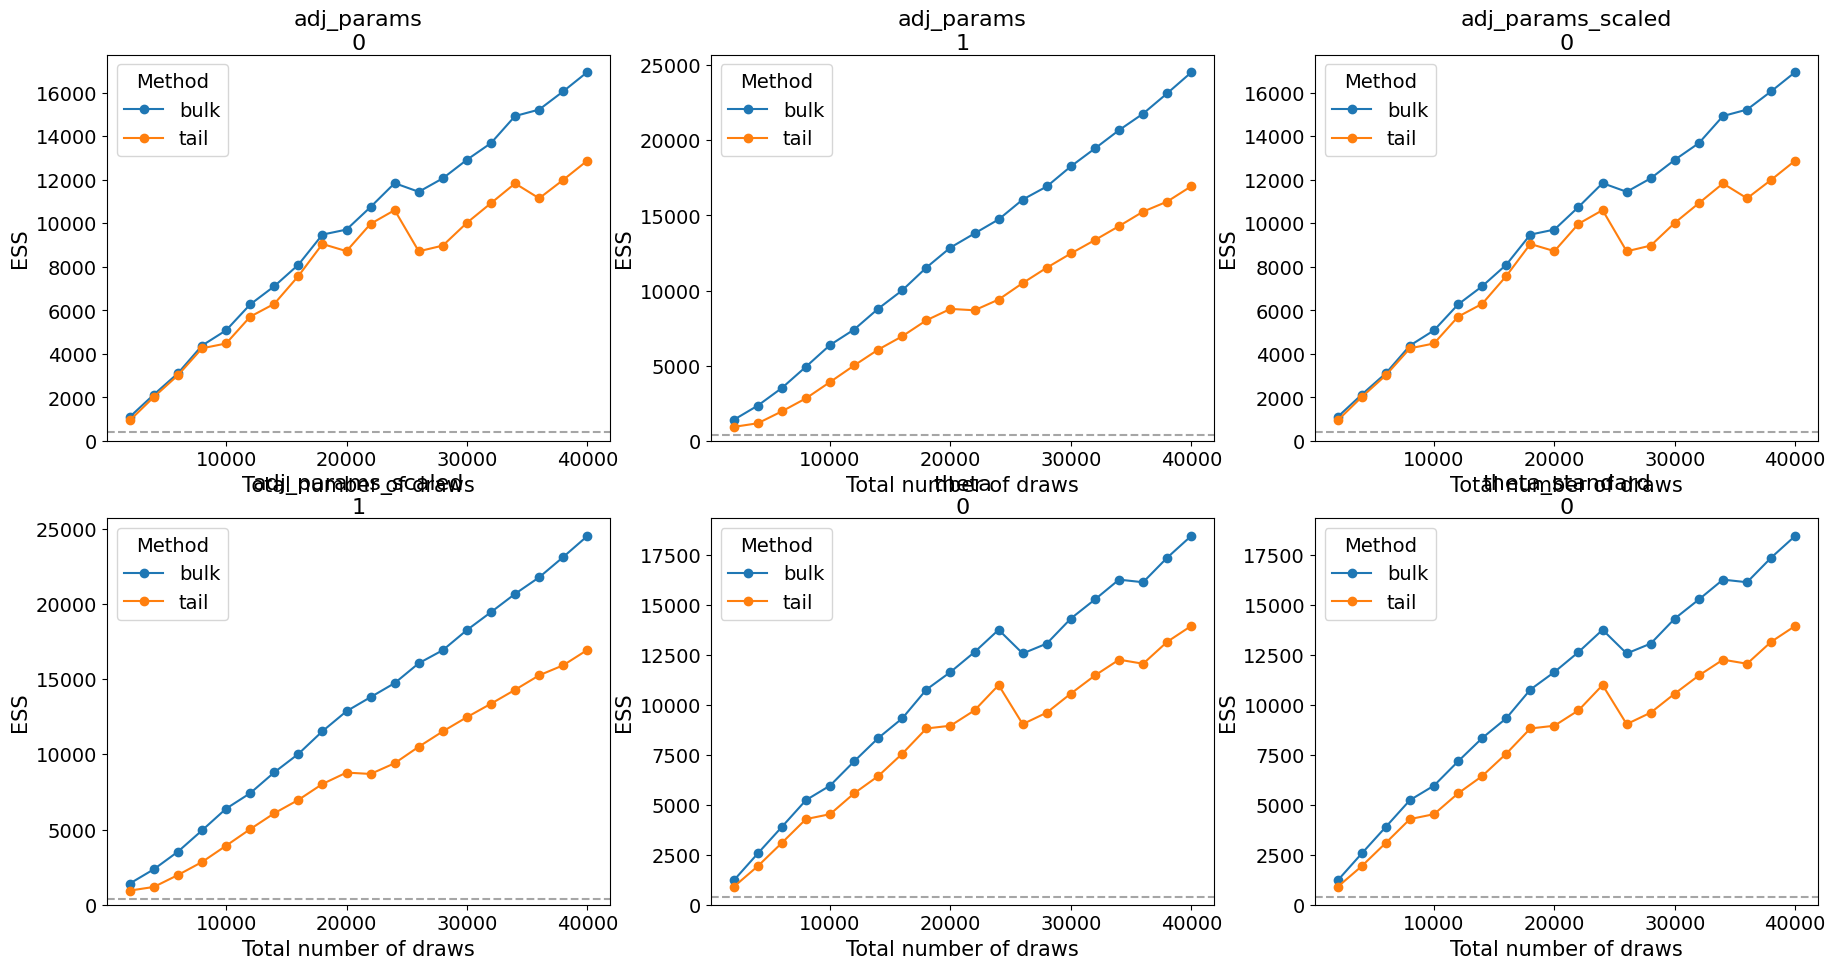

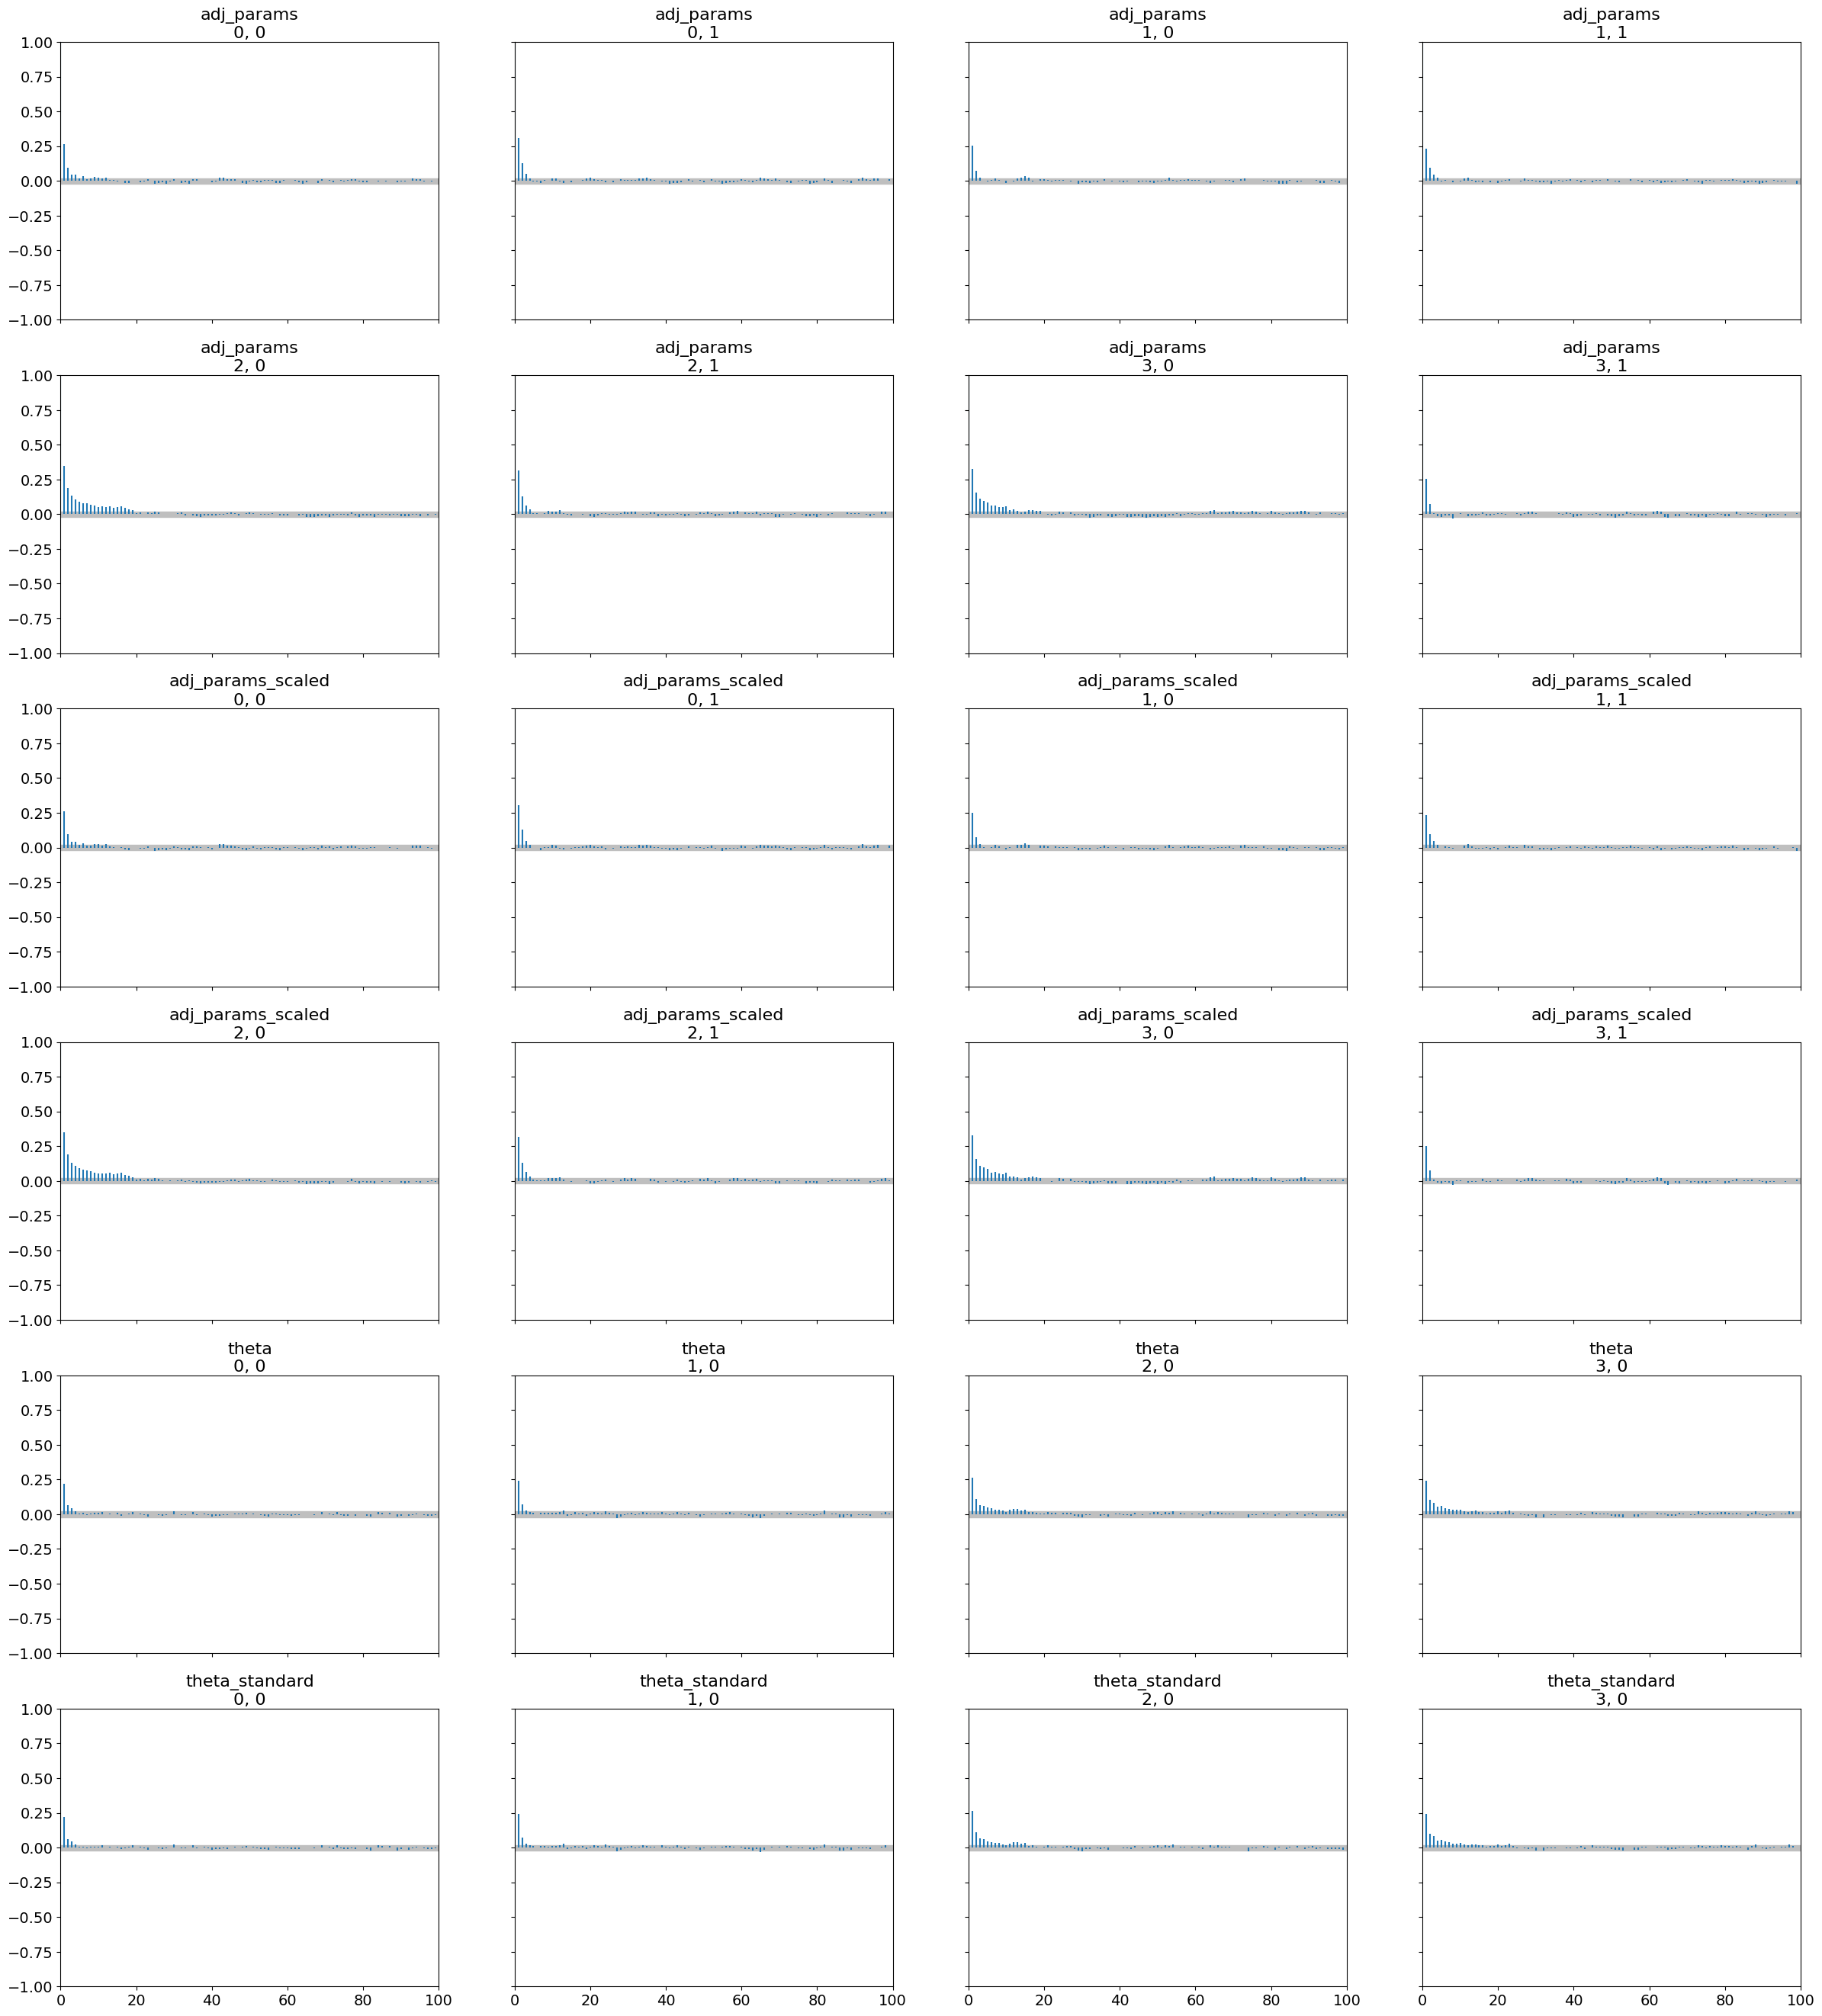

In [8]:
seed = 0
folder_name = "fig/misspec_ma1/"
model = get_robust_model
prior = get_prior()
rng_key = random.PRNGKey(seed)
rng_key, sub_key = random.split(rng_key)
sim_fn = partial(assumed_dgp, n_obs=100)
sum_fn = calculate_summary_statistics
pseudo_true_param = jnp.array([0.0])
x_obs = true_dgp(key=sub_key, n_obs=100)
x_obs = calculate_summary_statistics(x_obs)
# x_obs = jnp.array([0.01, 0])
mcmc = run_rsnl(model, prior, sim_fn, sum_fn,
                                                rng_key, x_obs,
                                                jax_parallelise=True,
                                                true_params=pseudo_true_param
                                                )
mcmc.print_summary()
isExist = os.path.exists(folder_name)
if not isExist:
    os.makedirs(folder_name)
inference_data = az.from_numpyro(mcmc)

with open(f'{folder_name}thetas.pkl', 'wb') as f:
    pkl.dump(inference_data.posterior.theta, f)

with open(f'{folder_name}adj_params.pkl', 'wb') as f:
    pkl.dump(inference_data.posterior.adj_params, f)

plot_and_save_all(inference_data, pseudo_true_param,
                    folder_name=folder_name)


In [9]:
import numpy as np
posterior_samples = inference_data.posterior.theta
posterior_samples = np.ravel(np.concatenate(posterior_samples, axis=0))
np.std(posterior_samples)

0.107027635

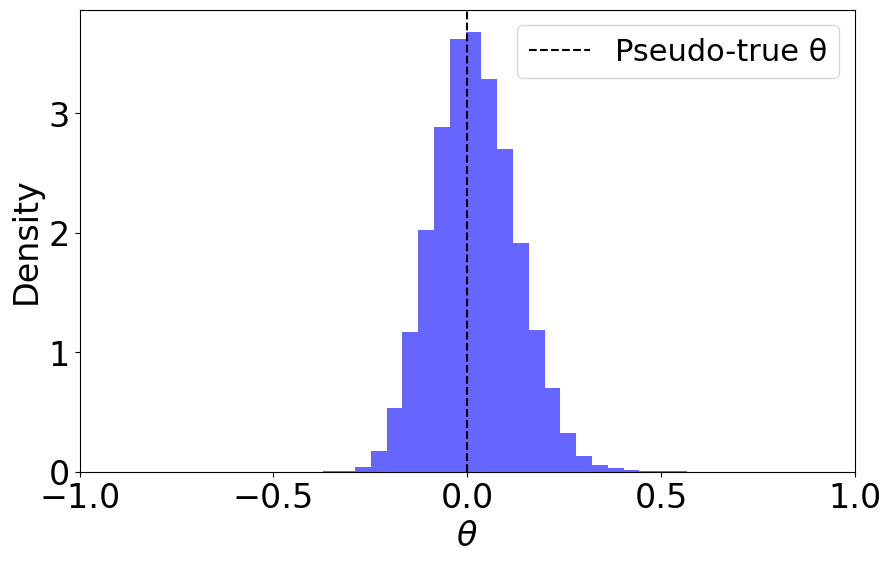

In [20]:
import matplotlib.pyplot as plt

thetas = posterior_samples
plt.rcParams.update({'font.size': 24})

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.hist(thetas, density=True, bins=30, color='blue', alpha=0.6)  # Histogram with 30 bins
# plt.title('Posterior Distribution of Theta')  # Title of the plot
plt.xlabel(r'$\theta$', fontsize=24)  # X-axis label
plt.ylabel('Density', fontsize=24)  # Y-axis label
# plt.title("RSNL", fontsize=24)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Enable grid with custom settings
plt.axvline(x=0, color='black', linestyle='--', label='Pseudo-true θ')  # Add vertical line at x=0
# plt.text(np.mean(thetas), plt.ylim()[1] * 0.9, color='red')  # Text label for mean
plt.xlim([-1, 1])  # Set x-axis limits
plt.legend(fontsize=22)

plt.savefig("rsnl.pdf")
plt.show()  # Show the plot
# plt.tight_layout()

# Example usage:
# Assuming 'thetas' is your array of theta values
# plot_theta_histogram(thetas)

with open(f'thetas.pkl', 'wb') as f:
    thetas = pkl.dump(posterior_samples[::4], f)  # cut down to 10000 samples

In [25]:
def b_theta(t):
    return np.array([1 + t ** 2, t])
key = random.PRNGKey(0)
# Generate values for b_theta
t_vals = np.linspace(-1, 1, 101)
b_theta_vals = np.array([b_theta(t) for t in t_vals])
# Plot the histogram of posterior samples
plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=50, density=True, alpha=0.6, color='blue', label='Posterior Samples')

# Plot the prior distribution for comparison
theta_range = np.linspace(-1, 1, 200)

# Plot the pseudo-true parameter value
theta_pseudo_true = 0.0  # Adjust based on your context
plt.axvline(theta_pseudo_true, color='black', linestyle='--', label='Pseudo-true θ')

# Add labels and legend
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
# plt.title('Posterior Distribution of $\theta$')
plt.legend()
plt.tight_layout()
plt.savefig("figs/fig2a.pdf")
plt.clf()

# Posterior predictive simulations
num_posterior_samples = len(posterior_samples)
num_pp_samples = 2_000  # Number of posterior predictive samples

# Initialize array to store summary statistics
posterior_pred_sims = np.empty((num_pp_samples, 2))

# Perform posterior predictive simulations
for i in range(num_pp_samples):
    key, subkey = random.split(key)
    t1 = posterior_samples[i]
    y = sim_fn(subkey, t1)
    posterior_pred_sims[i, 0] = autocov(y, lag=0)
    posterior_pred_sims[i, 1] = autocov(y, lag=1)

# Plot the joint distribution of summary statistics from posterior predictive simulations
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 24})
plt.scatter(posterior_pred_sims[:, 1], posterior_pred_sims[:, 0], c='blue', alpha=0.1)

# Plot the observed summary statistics
plt.scatter(x_obs[1], x_obs[0], c='black', marker='x', s=100, label='S(y)')

# Plot the b_theta function for reference
plt.plot(b_theta_vals[:, 1], b_theta_vals[:, 0], color='orange', label=r'$b(\theta)$', linewidth=4)

# Set axis limits and labels
plt.xlim(-2.0, 2.0)
plt.xticks([-2, 0, 2])
plt.ylim(-0.5, 2.5)
plt.yticks([-0.5, 1, 2.5])
plt.xlabel(r'$\zeta_1$')
plt.ylabel(r'$\zeta_2$')
# plt.title('Posterior Predictive Summary Statistics')
plt.legend()
plt.tight_layout()
plt.savefig("figs/rsnl_ppc.pdf")
plt.clf()


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [12]:
adj_params = np.concatenate(inference_data.posterior.adj_params, axis=0)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import elfi.visualization.visualization

# Define the number of bins
mbins = 30

# Assuming adj_params is a 2D array with shape (num_samples, num_params)
# Extract gamma values from the results
gamma_dict = dict(zip(['gamma_{}'.format(index) for index in range(adj_params.shape[1])], adj_params.T))

# Set global font size
plt.rcParams.update({'font.size': 24})

# Plot the marginal distributions
for i, (key, values) in enumerate(gamma_dict.items()):
    plt.figure(figsize=(8, 6))
    
    # Plot the posterior distribution as a histogram
    plt.hist(values, bins=mbins, density=True, alpha=0.8, color='black', label='Posterior')
    
    # Plot the prior distribution (Laplace(0, 1))
    x = np.linspace(-10, 10, 1000)
    prior = stats.laplace.pdf(x, loc=0, scale=1)
    plt.plot(x, prior, 'green', linestyle='dashed', lw=3, label='Prior')
    
    plt.xlim([-10, 10])
    plt.xticks([-10, -5, 0, 5, 10])
    plt.xlabel(r"$\gamma_{}$".format(str(i+1)))
    plt.ylabel('Density')
    plt.legend(fontsize=22)
    plt.tight_layout()
    plt.savefig(f"rsnl_adj_param_{str(i)}.pdf")
    plt.clf()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>